### Importing the CSV files as DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV files as pandas DataFrames
df_kiwo = pd.read_csv('kiwo.csv', sep=',')
df_umsatzdaten = pd.read_csv('umsatzdaten_gekuerzt.csv', sep=',')
df_wetter = pd.read_csv('wetter.csv', sep=',')

# Convert date to datetime for all DataFrames to have a column to join on
df_kiwo['Datum'] = pd.to_datetime(df_kiwo['Datum'])
df_umsatzdaten['Datum'] = pd.to_datetime(df_umsatzdaten['Datum'])
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])

# Check if it worked
print(df_kiwo.tail(5))
print(df_umsatzdaten.tail(5))
print(df_wetter.head(5))

        Datum  KielerWoche
67 2019-06-26            1
68 2019-06-27            1
69 2019-06-28            1
70 2019-06-29            1
71 2019-06-30            1
          Datum  Warengruppe     Umsatz
9329 2017-12-21            6  87.471228
9330 2017-12-22            6  71.911652
9331 2017-12-23            6  84.062223
9332 2017-12-24            6  60.981969
9333 2017-12-27            6  34.972644
       Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0 2012-01-01         8.0      9.8250                   14        58.0
1 2012-01-02         7.0      7.4375                   12         NaN
2 2012-01-03         8.0      5.5375                   18        63.0
3 2012-01-04         4.0      5.6875                   19        80.0
4 2012-01-05         6.0      5.3000                   23        80.0


### Merging the DataFrames

In [2]:
# Merge the DataFrames on Datum with an outer join
df_merge = pd.merge(df_umsatzdaten, df_kiwo, on='Datum', how='outer')
df_merge_all = pd.merge(df_merge, df_wetter, on='Datum', how='outer')

# Save the merged DataFrame as a CSV file in this directory
df_merge_all.to_csv('merged_dataframe.csv', index=False)

# Describe the merged DataFrame
print(df_merge_all.describe())

# Describe the variable type of the columns in the DataFrame
print(df_merge_all.dtypes)

                               Datum  Warengruppe       Umsatz  KielerWoche  \
count                          10119  9334.000000  9334.000000        250.0   
mean   2016-01-04 09:37:20.260895488     3.088172   206.749044          1.0   
min              2012-01-01 00:00:00     1.000000     7.051201          1.0   
25%              2014-08-31 00:00:00     2.000000    96.897441          1.0   
50%              2016-01-06 00:00:00     3.000000   161.900831          1.0   
75%              2017-05-26 00:00:00     4.000000   280.644663          1.0   
max              2019-08-01 00:00:00     6.000000  1879.461831          1.0   
std                              NaN     1.489002   144.545189          0.0   

         Bewoelkung    Temperatur  Windgeschwindigkeit   Wettercode  
count  10048.000000  10103.000000         10103.000000  7581.000000  
mean       4.748507     12.014560            11.026527    37.072022  
min        0.000000    -10.250000             3.000000     0.000000  
25%     

### Converting and Replacing Missing Values

In [3]:
# Convert KielerWoche to integer and replace missing values with 0
df_merge_all['KielerWoche'] = df_merge_all['KielerWoche'].fillna(0)
df_merge_all['KielerWoche'] = df_merge_all['KielerWoche'].astype(int)

# Describe the DataFrame after modification
print(df_merge_all.describe())

# Save the modified DataFrame as a CSV file again
df_merge_all.to_csv('merged_dataframe.csv', index=False)

# Inspect the rows with missing values in the wettercode column
print(df_merge_all[df_merge_all['Wettercode'].isnull()])

# Replace missing Wettercode values with 0 "Bewölkungsentwicklung nicht beobachtet"
df_merge_all['Wettercode'] = df_merge_all['Wettercode'].fillna(0)

                               Datum  Warengruppe       Umsatz   KielerWoche  \
count                          10119  9334.000000  9334.000000  10119.000000   
mean   2016-01-04 09:37:20.260895488     3.088172   206.749044      0.024706   
min              2012-01-01 00:00:00     1.000000     7.051201      0.000000   
25%              2014-08-31 00:00:00     2.000000    96.897441      0.000000   
50%              2016-01-06 00:00:00     3.000000   161.900831      0.000000   
75%              2017-05-26 00:00:00     4.000000   280.644663      0.000000   
max              2019-08-01 00:00:00     6.000000  1879.461831      1.000000   
std                              NaN     1.489002   144.545189      0.155235   

         Bewoelkung    Temperatur  Windgeschwindigkeit   Wettercode  
count  10048.000000  10103.000000         10103.000000  7581.000000  
mean       4.748507     12.014560            11.026527    37.072022  
min        0.000000    -10.250000             3.000000     0.000000  

### Analyzing Wettercode Frequency

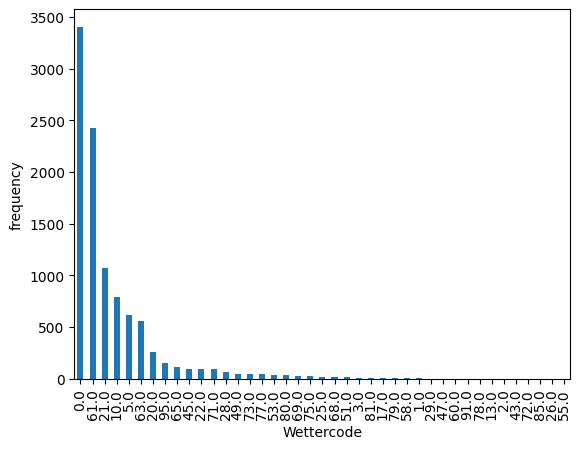

Wettercode
0.0     3405
61.0    2427
21.0    1075
10.0     790
5.0      613
63.0     563
20.0     264
95.0     151
65.0     114
45.0      98
22.0      96
71.0      91
28.0      68
49.0      49
73.0      48
77.0      45
53.0      35
80.0      33
69.0      28
75.0      25
Name: count, dtype: int64


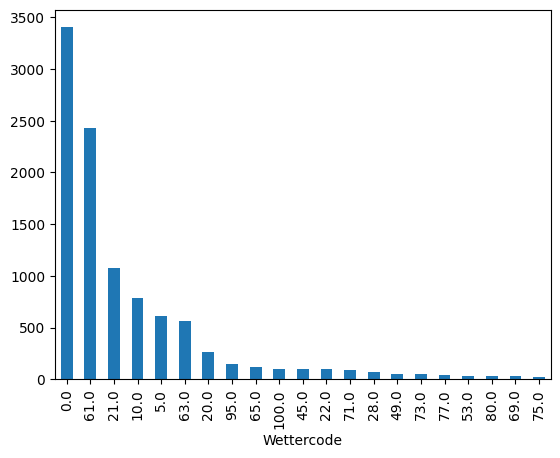

In [4]:
# Create a bar chart of the frequency of the different Wettercodes
df_merge_all['Wettercode'].value_counts().plot(kind='bar')
plt.ylabel('frequency')
plt.show()

# List the 20 most frequent Wettercodes and their frequency
print(df_merge_all['Wettercode'].value_counts().head(20))

# Replace all Wettercodes that are not the 20 most frequent ones with 100 "Andere"
df_merge_all.loc[~df_merge_all['Wettercode'].isin(df_merge_all['Wettercode'].value_counts().head(20).index), 'Wettercode'] = 100

# Create a bar chart of the frequency of the different Wettercodes with the labels on the x-axis
df_merge_all['Wettercode'].value_counts().plot(kind='bar')
plt.show()

### Labeling Wettercodes

In [5]:
# Create a dictionary with the labels for the Wettercodes
wettercode_labels_long = {
    0: 'Bewölkungsentwicklung nicht beobachtet', 61: 'Durchgehender leichter und nicht gefrierender Regen', 
    21: 'Regen hat aufgehört', 10: 'Feuchter Dunst', 5: 'Trockener Dunst', 63: 'Durchgehender mäßiger nicht gefrierender Regen', 
    20: 'Sprühregen oder Schneegriesel hat aufgehört', 95: 'Leichtes oder mäßiges Gewitter mit Regen oder Schnee', 
    65: 'Durchgehender starker und nicht gefrierender Regen', 45: 'Nebel, Himmel ist nicht erkennbar, Nebel unverändert', 
    22: 'Schneefall hat aufgehört', 71: 'Durchgehender leichter Schneefall', 28: 'Nebel hat sich aufgelöst', 
    49: 'Nebel mit Reifbildung, Himmel ist nicht erkennbar', 73: 'Durchgehender mäßiger Schneefall', 
    77: 'Schneegrieseln mit oder ohne Nebel', 53: 'Durchgehender mäßiger und nicht gefrierender Sprühregen', 
    80: 'Leichter Regenschauer', 100: 'Andere'
}

# Create shorter labels for the Wettercodes in the DataFrame for better interpretability
wettercode_labels_short = {
    0: 'Bewölkungsentwicklung nicht beobachtet', 61: 'Regen 1', 21: 'Regen aufgehört', 10: 'Dunst', 
    5: 'Dunst', 63: 'Regen 2', 20: 'Regen hat aufgehört', 95: 'Gewitter', 65: 'Regen 3', 
    45: 'Nebel 1', 22: 'Schnee aufgehört', 71: 'Schnee 1', 28: 'Nebel aufgelöst', 49: 'Nebel 2', 
    73: 'Schnee 2', 77: 'Schnee 3', 53: 'Regen 4', 80: 'Regen 5', 100: 'Andere'
}

# Map the labels to the Wettercodes in the DataFrame and create a new column with the labels
df_merge_all['wettercode_labels_long'] = df_merge_all['Wettercode'].map(wettercode_labels_long)
df_merge_all['wettercode_labels_short'] = df_merge_all['Wettercode'].map(wettercode_labels_short)

### Analyzing Umsatz by Wettercode

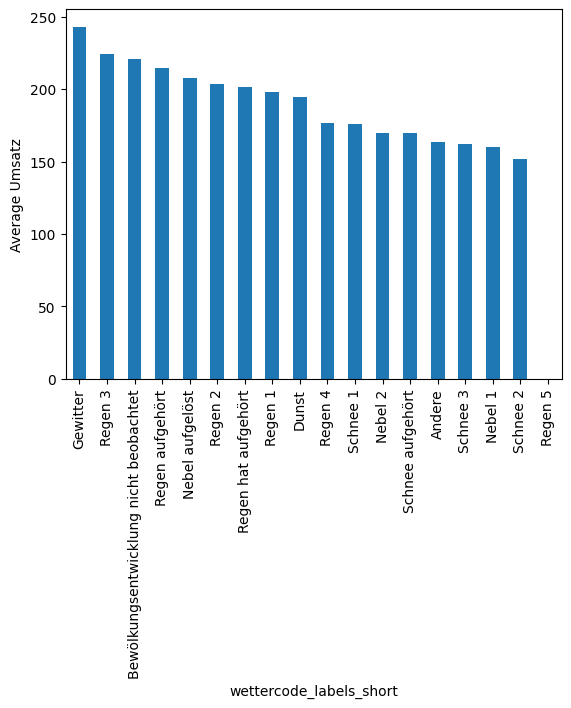

wettercode_labels_short
Gewitter                                  242.831653
Regen 3                                   223.957346
Bewölkungsentwicklung nicht beobachtet    220.951447
Regen aufgehört                           214.536901
Nebel aufgelöst                           207.520172
Regen 2                                   203.809247
Regen hat aufgehört                       201.290593
Regen 1                                   197.814976
Dunst                                     194.774617
Regen 4                                   176.433923
Schnee 1                                  176.110211
Nebel 2                                   169.605042
Schnee aufgehört                          169.409706
Andere                                    163.244952
Schnee 3                                  162.209776
Nebel 1                                   160.154311
Schnee 2                                  151.601915
Regen 5                                          NaN
Name: Umsatz, dtype: f

In [6]:
# For the twenty most frequent Wettercode labels, calculate the mean of the Umsatz and create a bar chart of the result
df_merge_all.groupby('wettercode_labels_short')['Umsatz'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.ylabel('Average Umsatz')
plt.show()

# Print the mean of the Umsatz for the twenty most frequent Wettercode labels
print(df_merge_all.groupby('wettercode_labels_short')['Umsatz'].mean().sort_values(ascending=False).head(20))

# Save the DataFrame as a CSV file in this directory
df_merge_all.to_csv('merged_dataframe.csv', index=False)

### Splitting the Data into Training and Validation Sets

In [7]:
# Define the date thresholds for training and validation datasets
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'

# Convert to datetime if not already
df_merge_all['Datum'] = pd.to_datetime(df_merge_all['Datum'])

# Split the data based on the date thresholds
train_data = df_merge_all[df_merge_all['Datum'] <= train_end_date]
validation_data = df_merge_all[(df_merge_all['Datum'] > train_end_date) & (df_merge_all['Datum'] <= validation_end_date)]

# Check the dimensions of the datasets
print('Training dataset dimensions:', train_data.shape)
print('Validation dataset dimensions:', validation_data.shape)

# Save the training and validation datasets as CSV files
train_data.to_csv('train_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)

Training dataset dimensions: (7917, 10)
Validation dataset dimensions: (1849, 10)
